<a href="https://colab.research.google.com/github/infinitebhat/Data-Science-Practice-Excercises/blob/master/RFM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KPMG Virtual Internship Program- Business consultant**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
import seaborn as sns

In [3]:
!pip install squarify

In [5]:
import squarify

In [7]:
df= pd.ExcelFile("/content/kpmg_raw_data.xlsx")

In [8]:
df.sheet_names

['Title Sheet',
 'CustomerDemographic',
 'CustomerAddress',
 'rfm',
 'Transactions',
 'NewCustomerList']

#VISUALIZATION OF CUSTOMER DEMOGRAPHIC INFORMATIONS

Let dfd be dataframe for CustomerDemographic

In [9]:
df= pd.read_excel("/content/kpmg_raw_data.xlsx", sheet_name="CustomerDemographic")
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,66.993833,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.796573,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.719861,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,59.013011,Not Specified,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.393833,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [17]:
print(df['Age'].mean())

43.192552410871706


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


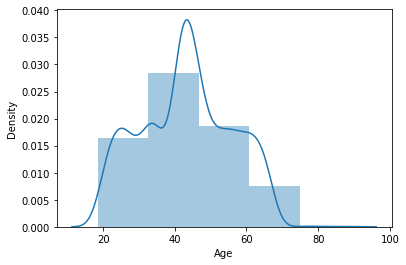

In [22]:
sns.distplot(df["Age"], bins=5);

Let df1 be data frame of rfm value sheet

In [119]:
df1= pd.read_excel("/content/kpmg_raw_data.xlsx", sheet_name='rfm')

In [120]:
df1.head()

,Row Labels,Min of regency,Count of product_id,Sum of Profit
0,1,7.0,11.0,3018.09
1,2,128.0,3.0,2226.26
2,3,102.0,8.0,3362.81
3,4,195.0,2.0,220.57
4,5,16.0,6.0,2394.94


In [121]:
df1=df1.rename(columns={'Row Labels':'Customer ID',
                   'Min of regency': 'Recency',
                   'Count of product_id':'Frequency',
                   'Sum of Profit':'MonetaryValue'})

In [122]:
df1.head()

,Customer ID,Recency,Frequency,MonetaryValue
0,1,7.0,11.0,3018.09
1,2,128.0,3.0,2226.26
2,3,102.0,8.0,3362.81
3,4,195.0,2.0,220.57
4,5,16.0,6.0,2394.94


In [123]:
df1.isna

<bound method DataFrame.isna of       Customer ID  Recency  Frequency  MonetaryValue
0               1      7.0       11.0   3.018090e+03
1               2    128.0        3.0   2.226260e+03
2               3    102.0        8.0   3.362810e+03
3               4    195.0        2.0   2.205700e+02
4               5     16.0        6.0   2.394940e+03
...           ...      ...        ...            ...
3491         3499     51.0        7.0   4.955250e+03
3492         3500    144.0        6.0   1.785860e+03
3493         5034     84.0        3.0   2.694850e+02
3494      (blank)      NaN        NaN            NaN
3495  Grand Total      0.0    20000.0   1.093028e+07

[3496 rows x 4 columns]>

In [124]:
df1=df1.dropna(axis='rows')

In [125]:
df1[['Recency','Frequency','MonetaryValue']].describe()

,Recency,Frequency,MonetaryValue
count,3495.000000,3495.000000,3.495000e+03
mean,61.365951,11.444921,6.254812e+03
std,58.383297,338.214605,1.848432e+05
min,0.000000,1.000000,1.508000e+01
25%,17.000000,4.000000,1.841490e+03
50%,44.000000,6.000000,2.862330e+03
75%,86.000000,7.000000,4.188565e+03
max,353.000000,20000.000000,1.093028e+07


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

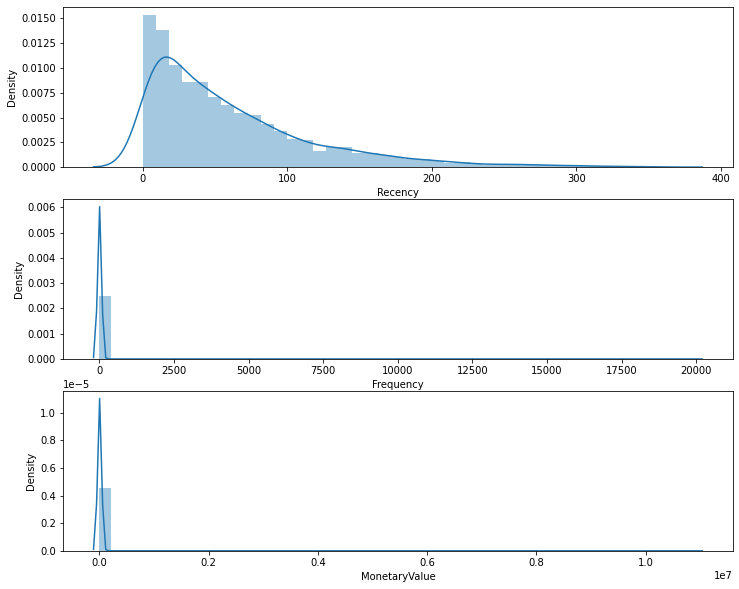

In [126]:
#Plot RFM distribution
plt.figure(figsize=(12,10))

#Plot distribution of R
plt.subplot(3,1,1); sns.distplot(df1['Recency'])

#Plot distribution of F
plt.subplot(3,1,2); sns.distplot(df1['Frequency'])

#Plot distribution of M
plt.subplot(3,1,3); sns.distplot(df1['MonetaryValue'])

plt.show()

In [127]:
#calculate R and F groups
#create labels for recency and frequency
r_labels = range(5, 0, -1); f_labels = range(1,6); m_labels= range(1,6)

#Assign this labels to 4 equal percentile groups
r_groups= pd.qcut(df1['Recency'], q=5, labels=r_labels)

f_groups = pd.qcut(df1['Frequency'], q=5, labels=f_labels)

m_groups = pd.qcut(df1['MonetaryValue'], q=5, labels=f_labels)

#create new columns
df1= df1.assign(R=r_groups.values, F=f_groups.values, M=m_groups.values)

In [128]:
df1.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M
0,1,7.0,11.0,3018.09,5,5,3
1,2,128.0,3.0,2226.26,1,1,2
2,3,102.0,8.0,3362.81,1,4,4
3,4,195.0,2.0,220.57,1,1,1
4,5,16.0,6.0,2394.94,4,3,2


In [129]:
#concatinating RFM quartile values to create a RFM segment
def join_rfm(x):
    return str(x['R'])+ str(x['F']) + str(x['M'])

In [130]:
df1['RFM']= df1.apply(join_rfm, axis=1)
df1.head()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM
0,1,7.0,11.0,3018.09,5,5,3,553
1,2,128.0,3.0,2226.26,1,1,2,112
2,3,102.0,8.0,3362.81,1,4,4,144
3,4,195.0,2.0,220.57,1,1,1,111
4,5,16.0,6.0,2394.94,4,3,2,432


In [131]:
#count number of unique segments
rfm_count_unique = df1.groupby('RFM', sort=True)
print(rfm_count_unique.sum())

     Recency  Frequency  MonetaryValue
RFM                                   
111  40459.0      557.0   1.766227e+05
112  15652.0      305.0   1.878982e+05
113   8565.0      196.0   1.594058e+05
114   2263.0       56.0   5.568738e+04
115    341.0        8.0   9.350090e+03
..       ...        ...            ...
545    426.0      466.0   3.567114e+05
552     15.0       27.0   6.820650e+03
553     98.0      133.0   4.191248e+04
554    182.0      277.0   1.127043e+05
555    720.0    21072.0   1.161076e+07

[117 rows x 3 columns]


We have 117 different segments using the concatinating... this is unwieldy for any parctical use.

Summing the score

In [132]:
df1['rfm_score']= df1[['R', 'F', 'M']].sum(axis=1)
print(df1['rfm_score'].head())

0    13
1     4
2     9
3     3
4     9
Name: rfm_score, dtype: int64


In [133]:
df1.tail()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score
3490,3498,127.0,6.0,3.147330e+03,1,3,3,133,7
3491,3499,51.0,7.0,4.955250e+03,3,4,5,345,12
3492,3500,144.0,6.0,1.785860e+03,1,3,2,132,6
3493,5034,84.0,3.0,2.694850e+02,2,1,1,211,4
3495,Grand Total,0.0,20000.0,1.093028e+07,5,5,5,555,15


In [134]:
df1=df1.set_index('Customer ID')
df1.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score
Customer ID,,,,,,,,
1,7.0,11.0,3018.09,5,5,3,553,13
2,128.0,3.0,2226.26,1,1,2,112,4
3,102.0,8.0,3362.81,1,4,4,144,9
4,195.0,2.0,220.57,1,1,1,111,3
5,16.0,6.0,2394.94,4,3,2,432,9


In [135]:
df1.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score
Customer ID,,,,,,,,
3498,127.0,6.0,3.147330e+03,1,3,3,133,7
3499,51.0,7.0,4.955250e+03,3,4,5,345,12
3500,144.0,6.0,1.785860e+03,1,3,2,132,6
5034,84.0,3.0,2.694850e+02,2,1,1,211,4
Grand Total,0.0,20000.0,1.093028e+07,5,5,5,555,15


Define rfm_level function

In [136]:
df1['RFM'] = df1['RFM'].astype(int)

In [143]:

def rfm_level(df):
    if df['rfm_score'] >=12:
        return 'Champions/Top Customers'
    elif (df['rfm_score']>=10) and (df['rfm_score']<12):
        return 'Potential Loyalists'
    elif (df['rfm_score']>=8) and (df['rfm_score']<10) and (df['RFM'] >=400):
        return 'New Customers'
    elif ((df['rfm_score']>=6) and (df['rfm_score']<8)):
        return 'At-Risk Customers'
    elif ((df['rfm_score']>=5) and (df['rfm_score']<6)):
        return "Can't Loose them"    
    else:
          return 'Lost Customers'

In [144]:
df1['Customer Category']= df1.apply(rfm_level, axis=1)

In [145]:
df1.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score,Customer Category
Customer ID,,,,,,,,,
1,7.0,11.0,3018.09,5,5,3,553,13,Champions/Top Customers
2,128.0,3.0,2226.26,1,1,2,112,4,Lost Customers
3,102.0,8.0,3362.81,1,4,4,144,9,Lost Customers
4,195.0,2.0,220.57,1,1,1,111,3,Lost Customers
5,16.0,6.0,2394.94,4,3,2,432,9,New Customers


In [146]:
df1.tail()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score,Customer Category
Customer ID,,,,,,,,,
3497,52.0,3.0,1648.320000,3,1,2,312,6,At-Risk Customers
3498,127.0,6.0,3147.330000,1,3,3,133,7,At-Risk Customers
3499,51.0,7.0,4955.250000,3,4,5,345,12,Champions/Top Customers
3500,144.0,6.0,1785.860000,1,3,2,132,6,At-Risk Customers
5034,84.0,3.0,269.484972,2,1,1,211,4,Lost Customers


Calculating average values for ecah rfm_level and return a size of each segment

In [151]:
Customer_aggregate = df1.groupby('Customer Category').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean','count']
}).round(1)

print(Customer_aggregate)

                        Recency Frequency MonetaryValue      
                           mean      mean          mean count
Customer Category                                            
At-Risk Customers          66.7       4.3        2156.7   634
Can't Loose them           93.7       3.7        1796.1   263
Champions/Top Customers    21.2       8.5        5180.4   792
Lost Customers            116.1       4.4        2127.3   854
New Customers              15.2       4.6        2292.5   278
Potential Loyalists        40.6       6.7        3764.7   673


Graphical represenation of segmentation:

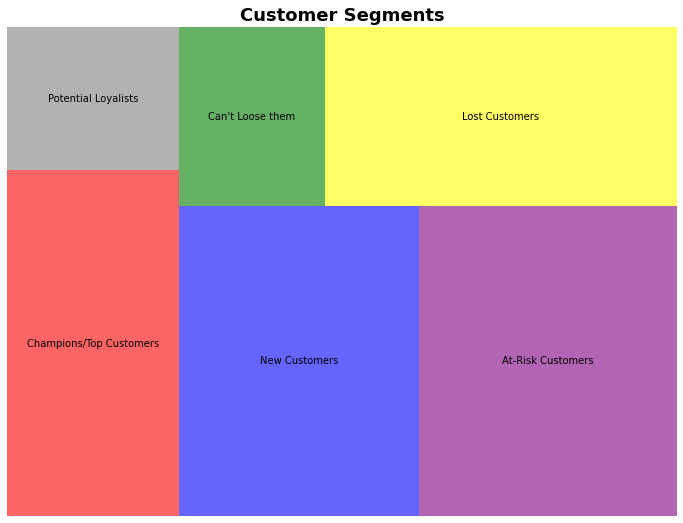

In [156]:
#rfm_level_agg.columns = Customer_aggregate.columns.droplevel()
Customer_aggregate.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']

fig = plt.gcf()
ax= fig.add_subplot()
fig.set_size_inches(12,9)

squarify.plot(sizes=Customer_aggregate['Count'],
             label=["Champions/Top Customers", 
                    "Potential Loyalists",
                    "New Customers",
                    "At-Risk Customers",
                    "Can't Loose them",
                    'Lost Customers'], color=['red','grey','blue','purple','green','yellow'], alpha=.6)

plt.title('Customer Segments', fontsize= 18, fontweight='bold')
plt.axis('off')
plt.show()

In [166]:
df1.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score,Customer Category
Customer ID,,,,,,,,,
1,7.0,11.0,3018.09,5,5,3,553,13,Champions/Top Customers
2,128.0,3.0,2226.26,1,1,2,112,4,Lost Customers
3,102.0,8.0,3362.81,1,4,4,144,9,Lost Customers
4,195.0,2.0,220.57,1,1,1,111,3,Lost Customers
5,16.0,6.0,2394.94,4,3,2,432,9,New Customers


In [167]:
df1.reset_index()

,Customer ID,Recency,Frequency,MonetaryValue,R,F,M,RFM,rfm_score,Customer Category
0,1,7.0,11.0,3018.090000,5,5,3,553,13,Champions/Top Customers
1,2,128.0,3.0,2226.260000,1,1,2,112,4,Lost Customers
2,3,102.0,8.0,3362.810000,1,4,4,144,9,Lost Customers
3,4,195.0,2.0,220.570000,1,1,1,111,3,Lost Customers
4,5,16.0,6.0,2394.940000,4,3,2,432,9,New Customers
...,...,...,...,...,...,...,...,...,...,...
3489,3497,52.0,3.0,1648.320000,3,1,2,312,6,At-Risk Customers
3490,3498,127.0,6.0,3147.330000,1,3,3,133,7,At-Risk Customers
3491,3499,51.0,7.0,4955.250000,3,4,5,345,12,Champions/Top Customers
3492,3500,144.0,6.0,1785.860000,1,3,2,132,6,At-Risk Customers


In [170]:
df1.to_csv("/content/output1.csv", index=True)